Mount google drive folder:

In [ ]:
from google.colab import files 
import io
uploaded = files.upload()

Saving GIACC Base HDM n_99.xlsx to GIACC Base HDM n_99.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('GIACC Base HDM n_99.xlsx',header=0)
print('Number of observations = {}, number of variables {}'.format(*df.shape))
df.head()

Number of observations = 99, number of variables 163


,fechaabl,numeroh,edad,sexo,FAA,frenadores,anticoagulantes,hta,dislip,dm,sahos,cpap,deportista,ACV,IC,enf_vasc_per,cardiop_isqu,Neoplasia,IRC,tipoFA,mesesFA,FlutterTipPre,EHRA,VolTACR,VolTACR_index,diamTAC1,diamTAC2,diamTAC3,FEVI,EnfValv,diamAP_AI,diamLong_AI,diamTransv_AI,Vol_AI,VOL_AI_INDEX,peso,talla,SuperCorporal,AislamientoVVPP,lineaTecho,...,ArAbs16,ArAbs17,ArAbs18,ArAbs19,ArAbs2,VAR00002,Ar001,Ar0102,Ar0203,Ar0304,Ar0405,Ar0506,Ar0607,Ar0708,Ar0809,Ar091,Ar111,Ar1112,Ar1213,Ar1314,Ar1415,Ar1516,Ar1617,Ar1718,Ar1819,Ar192,VAR00001,ArAb0_0_5,ArAb0_5_1,ArAb1_1_5,ArAb1_5_2,VAR00004,ArAbMayor2,SEPARAD,ArRel0_05,ArRel05_1,ArRel1_1_5,ArRel1_5_2,ArRelMay2,filter__
0,20261,326825,65,hombre,no,antagonistas calcio,Xarelto,si,si,no,no,no,NaN,no,no,no,no,no,no,paroxistica,12.0,SI,3,NaN,NaN,63.0,48.0,47.0,64.0,no,42.0,60.0,47.0,58.6,32.39,69.0,173.0,1.821632,si,no,...,99.75836,100.88260,101.67196,102.53308,103.22676,NaN,12.06764,20.10476,15.48820,13.08424,8.00124,6.47036,5.28632,3.71956,2.88236,3.16940,2.20064,2.05712,1.39932,1.44716,1.30364,1.07640,1.12424,0.78936,0.86112,0.69368,NaN,68.74608,21.52800,8.40788,4.54480,NaN,16.37324,NaN,0.5748,0.1800,0.0703,0.0380,0.1369,Selected
1,20291,219618,79,hombre,no,betabloqueantes,AVK,si,si,no,si,no,NaN,no,no,no,si,no,no,persistente,120.0,NO,2,167.0,76.152259,58.0,53.0,53.0,66.0,no,NaN,NaN,NaN,65.0,29.64,110.0,170.0,2.192975,si,si,...,114.15096,115.50924,116.59032,117.71298,118.73862,NaN,35.88354,20.31876,9.67428,8.39916,6.09840,5.87664,4.76784,4.13028,3.96396,2.66112,2.57796,2.46708,2.05128,1.96812,1.78794,1.52460,1.35828,1.08108,1.12266,1.02564,NaN,80.37414,21.39984,10.85238,6.11226,NaN,19.86138,NaN,0.5799,0.1544,0.0783,0.0441,0.1433,Not Selected
2,20292,545584,67,mujer,no,Ninguno,Xarelto,no,no,no,no,no,NaN,no,no,no,no,no,no,paroxistica,72.0,SI,1,83.0,44.498324,54.0,43.0,41.0,60.0,no,NaN,NaN,NaN,45.0,24.13,92.0,151.0,1.865239,si,no,...,93.93727,95.59634,97.26752,98.67228,99.71374,NaN,21.83433,16.14263,10.14818,6.83004,6.23665,4.79556,4.09318,3.64511,3.22126,2.82163,2.73686,2.57943,2.61576,2.26457,2.13136,1.84072,1.65907,1.67118,1.40476,1.04146,NaN,61.19183,18.57674,12.32798,7.61719,NaN,21.38626,NaN,0.5053,0.1534,0.1018,0.0629,0.1766,Not Selected
3,20297,187307,75,hombre,fleca o propa,Ninguno,AVK,si,si,no,no,no,NaN,no,no,no,no,no,no,paroxistica,36.0,NO,2,110.0,58.708831,65.0,49.0,52.0,54.0,no,36.0,56.0,38.0,33.6,18.15,87.0,157.0,1.873653,si,no,...,71.30380,72.68876,73.75994,74.90686,75.91312,NaN,13.61156,11.10132,8.45042,5.42082,4.11160,3.61388,3.64634,2.96468,3.00796,2.65090,2.87812,2.55352,2.13154,1.95842,1.56890,1.63382,1.38496,1.07118,1.14692,1.00626,NaN,42.69572,15.88376,11.09050,6.24314,NaN,32.28688,NaN,0.3946,0.1468,0.1025,0.0577,0.2984,Not Selected
4,20304,176453,82,hombre,no,betabloqueantes,Eliquis,si,si,si,si,si,sedentario,no,si,no,si,no,si,paroxistica,17.0,NO,3,157.0,84.374980,74.0,54.0,57.0,46.0,no,NaN,66.0,46.0,111.9,60.19,82.0,161.0,1.860741,si,no,...,146.40850,146.61500,146.73300,146.98375,147.19025,NaN,85.68275,26.25500,11.16575,6.54900,4.43975,3.17125,2.12400,1.65200,1.43075,1.00300,0.75225,0.54575,0.39825,0.45725,0.42775,0.35400,0.20650,0.11800,0.25075,0.20650,NaN,134.09225,9.38100,2.58125,1.13575,NaN,0.30975,NaN,0.9091,0.0636,0.0175,0.0077,0.0021,Not Selected


In [ ]:
df.describe()

,fechaabl,numeroh,edad,mesesFA,EHRA,VolTACR,VolTACR_index,diamTAC1,diamTAC2,diamTAC3,FEVI,diamAP_AI,diamLong_AI,diamTransv_AI,Vol_AI,VOL_AI_INDEX,peso,talla,SuperCorporal,num_VVPP_reconectadas,EHRAseg,meses_hasta_recurr,Fecha_ultimo_seguimiento,Recurrencia_0no_1si,Area,V_MEDIO,SLOPE,Q1,Q2,Q3,PorcVMen01,PorcVMen02,PorcVMen03,PorcVMen04,PorcVMen05,PorcVMen06,PorcVMen07,PorcVMen08,PorcVMen09,PorcVMen1,...,ArAbs15,ArAbs16,ArAbs17,ArAbs18,ArAbs19,ArAbs2,VAR00002,Ar001,Ar0102,Ar0203,Ar0304,Ar0405,Ar0506,Ar0607,Ar0708,Ar0809,Ar091,Ar111,Ar1112,Ar1213,Ar1314,Ar1415,Ar1516,Ar1617,Ar1718,Ar1819,Ar192,VAR00001,ArAb0_0_5,ArAb0_5_1,ArAb1_1_5,ArAb1_5_2,VAR00004,ArAbMayor2,SEPARAD,ArRel0_05,ArRel05_1,ArRel1_1_5,ArRel1_5_2,ArRelMay2
count,99.000000,99.000000,99.000000,98.000000,99.000000,94.000000,93.000000,93.000000,93.000000,93.000000,93.000000,47.000000,64.000000,64.000000,68.000000,70.000000,98.000000,98.000000,98.000000,36.000000,86.000000,30.000000,98.000000,98.000000,99.000000,99.000000,99.000000,89.000000,89.000000,89.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,0.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,0.0,89.000000,89.000000,89.000000,89.00000,0.0,89.000000,0.0,89.000000,89.000000,89.000000,89.000000,89.000000
mean,20640.292929,468305.737374,64.555556,43.336735,2.030303,122.010638,63.384324,60.924731,49.462366,47.526882,61.494624,39.638298,55.515625,41.937500,60.383824,31.080143,82.183673,169.867347,1.926080,2.500000,1.232558,5.466667,21036.591837,0.306122,134.943232,1.069285,-0.802930,0.149997,0.516354,1.459473,0.243668,0.375238,0.453714,0.511402,0.556927,0.594748,0.625567,0.652568,0.676402,0.697692,...,106.737991,108.334666,109.915241,111.304440,112.707119,113.931742,NaN,34.470223,17.843147,10.554615,7.768291,6.109616,5.128043,4.196414,3.655821,3.233617,2.866788,2.606773,2.394298,2.052872,1.988159,1.869316,1.596675,1.580575,1.389199,1.402679,1.224623,NaN,76.745891,19.080682,10.911419,7.19375,NaN,23.777247,NaN,0.559339,0.138669,0.079109,0.051852,0.171031
std,157.673406,225610.509628,9.159830,46.450049,0.613696,37.611624,19.248750,7.381287,7.180225,6.660382,7.287010,7.072376,10.079040,6.775012,25.799604,14.074688,17.007183,13.242884,0.206214,1.108409,0.501161,2.956388,83.018919,0.463251,25.648194,0.600231,0.573061,0.114337,0.431417,0.988894,0.140495,0.159071,0.164124,0.165658,0.166166,0.164907,0.162623,0.160292,0.157863,0.155402,...,27.348637,27.300561,27.244102,27.159268,27.096426,27.032781,NaN,21.023560,6.220006,3.620007,2.957518,2.374645,2.034911,1.609196,1.281050,1.156977,1.051968,1.003269,0.950194,0.836449,0.838973,0.828116,0.722727,0.716771,0.671884,0.712135,0.658223,NaN,26.590213,6.744003,4.301720,3.39383,NaN,18.297780,NaN,0.165719,0.038047,0.025963,0.021031,0.125314
min,20261.000000,45202.000000,35.000000,1.000000,1.000000,59.000000,30.796950,45.000000,33.000000,34.000000,39.000000,23.000000,34.000000,28.000000,24.000000,9.830000,48.000000,79.000000,1.359917,0.000000,1.000000,1.000000,20831.000000,0.000000,74.960000,0.139700,-4.548600,0.020500,0.056800,0.157000,0.021700,0.116300,0.165300,0.194800,0.220000,0.242800,0.263000,0.284700,0.309700,0.328500,...,54.535320,56.266600,57.842840,59.612880,61.344160,63.075440,NaN,7.046720,6.679640,4.444480,3.562500,2.312780,1.643600,0.511100,0.295900,0.215200,0.147950,0.107600,0.094150,0.094150,0.067250,0.107600,0.040350,0.013450,0.013450,0.000000,0.000000,NaN,28.424000,2.891750,0.470750,0.06725,NaN,0.000000,NaN,0.220000,0.021500,0.003500,0.000500,0.000000
25%,20515.500000,292951.000000,59.000000,5.250000,2.000000,94.000000,50.115038,57.000000,45.000000,43.000000,58.000000,36.000000,49.000000,37.000000,40.500000,20.625000,70.250000,165.000000,1.792666,2.000000,1.000000,3.000000,20973.000000,0.000000,118.22

In [ ]:
df.isnull().sum()


fechaabl       0
numeroh        0
edad           0
sexo           0
FAA            0
              ..
ArRel05_1     10
ArRel1_1_5    10
ArRel1_5_2    10
ArRelMay2     10
filter__       1
Length: 163, dtype: int64

Keep only numerical variables:

In [ ]:
dfnum = df.select_dtypes(include='number')
print('Number of observations = {}, number of variables {}'.format(*dfnum.shape))
dfnum.isnull().sum()



Number of observations = 99, number of variables 120


99

Drop columns with a all missing values:

In [ ]:
dfnum1 = dfnum.dropna(axis=1,how='all')
dfnum1.shape

(99, 116)

In [ ]:
dfnum1.head()

,fechaabl,numeroh,edad,mesesFA,EHRA,VolTACR,VolTACR_index,diamTAC1,diamTAC2,diamTAC3,FEVI,diamAP_AI,diamLong_AI,diamTransv_AI,Vol_AI,VOL_AI_INDEX,peso,talla,SuperCorporal,num_VVPP_reconectadas,EHRAseg,meses_hasta_recurr,Fecha_ultimo_seguimiento,Recurrencia_0no_1si,Area,V_MEDIO,SLOPE,Q1,Q2,Q3,PorcVMen01,PorcVMen02,PorcVMen03,PorcVMen04,PorcVMen05,PorcVMen06,PorcVMen07,PorcVMen08,PorcVMen09,PorcVMen1,...,ArAbs11,ArAbs12,ArAbs13,ArAbs14,ArAbs15,ArAbs16,ArAbs17,ArAbs18,ArAbs19,ArAbs2,Ar001,Ar0102,Ar0203,Ar0304,Ar0405,Ar0506,Ar0607,Ar0708,Ar0809,Ar091,Ar111,Ar1112,Ar1213,Ar1314,Ar1415,Ar1516,Ar1617,Ar1718,Ar1819,Ar192,ArAb0_0_5,ArAb0_5_1,ArAb1_1_5,ArAb1_5_2,ArAbMayor2,ArRel0_05,ArRel05_1,ArRel1_1_5,ArRel1_5_2,ArRelMay2
0,20261,326825,65,12.0,3,NaN,NaN,63.0,48.0,47.0,64.0,42.0,60.0,47.0,58.6,32.39,69.0,173.0,1.821632,NaN,1.0,6.0,20895.0,1.0,119.56,0.9759,-0.4958,0.1846,0.3903,0.9787,0.1009,0.2690,0.3985,0.5079,0.5748,0.6289,0.6731,0.7042,0.7283,0.7548,...,92.47472,94.53184,95.93116,97.37832,98.68196,99.75836,100.88260,101.67196,102.53308,103.22676,12.06764,20.10476,15.48820,13.08424,8.00124,6.47036,5.28632,3.71956,2.88236,3.16940,2.20064,2.05712,1.39932,1.44716,1.30364,1.07640,1.12424,0.78936,0.86112,0.69368,68.74608,21.52800,8.40788,4.54480,16.37324,0.5748,0.1800,0.0703,0.0380,0.1369
1,20291,219618,79,120.0,2,167.0,76.152259,58.0,53.0,53.0,66.0,NaN,NaN,NaN,65.0,29.64,110.0,170.0,2.192975,4.0,1.0,NaN,20979.0,0.0,138.58,0.9575,-0.5179,0.0961,0.3382,1.0824,0.2589,0.4055,0.4753,0.5359,0.5799,0.6223,0.6567,0.6865,0.7151,0.7343,...,104.35194,106.81902,108.87030,110.83842,112.62636,114.15096,115.50924,116.59032,117.71298,118.73862,35.88354,20.31876,9.67428,8.39916,6.09840,5.87664,4.76784,4.13028,3.96396,2.66112,2.57796,2.46708,2.05128,1.96812,1.78794,1.52460,1.35828,1.08108,1.12266,1.02564,80.37414,21.39984,10.85238,6.11226,19.86138,0.5799,0.1544,0.0783,0.0441,0.1433
2,20292,545584,67,72.0,1,83.0,44.498324,54.0,43.0,41.0,60.0,NaN,NaN,NaN,45.0,24.13,92.0,151.0,1.865239,NaN,1.0,NaN,21000.0,0.0,121.09,1.0885,-0.5646,0.1455,0.4890,1.4300,0.1803,0.3136,0.3974,0.4538,0.5053,0.5449,0.5787,0.6088,0.6354,0.6587,...,82.50543,85.08486,87.70062,89.96519,92.09655,93.93727,95.59634,97.26752,98.67228,99.71374,21.83433,16.14263,10.14818,6.83004,6.23665,4.79556,4.09318,3.64511,3.22126,2.82163,2.73686,2.57943,2.61576,2.26457,2.13136,1.84072,1.65907,1.67118,1.40476,1.04146,61.19183,18.57674,12.32798,7.61719,21.38626,0.5053,0.1534,0.1018,0.0629,0.1766
3,20297,187307,75,36.0,2,110.0,58.708831,65.0,49.0,52.0,54.0,36.0,56.0,38.0,33.6,18.15,87.0,157.0,1.873653,NaN,2.0,NaN,21013.0,0.0,108.21,1.8081,-0.3690,0.2240,0.8400,2.4892,0.1258,0.2284,0.3065,0.3566,0.3946,0.4280,0.4617,0.4891,0.5169,0.5414,...,61.45760,64.01112,66.14266,68.10108,69.66998,71.30380,72.68876,73.75994,74.90686,75.91312,13.61156,11.10132,8.45042,5.42082,4.11160,3.61388,3.64634,2.96468,3.00796,2.65090,2.87812,2.55352,2.13154,1.95842,1.56890,1.63382,1.38496,1.07118,1.14692,1.00626,42.69572,15.88376,11.09050,6.24314,32.28688,0.3946,0.1468,0.1025,0.0577,0.2984
4,20304,176453,82,17.0,3,157.0,84.374980,74.0,54.0,57.0,46.0,NaN,66.0,46.0,111.9,60.19,82.0,161.0,1.860741,NaN,1.0,NaN,20993.0,0.0,147.52,0.1869,-1.8882,0.0428,0.0801,0.1922,0.5809,0.7589,0.8346,0.8790,0.9091,0.9306,0.9450,0.9562,0.9659,0.9727,...,144.22550,144.77125,145.16950,145.62675,146.05450,146.40850,146.61500,146.73300,146.98375,147.19025,85.68275,26.25500,11.16575,6.54900,4.43975,3.17125,2.12400,1.65200,1.43075,1.00300,0.75225,0.54575,0.39825,0.45725,0.42775,0.35400,0.20650,0.11800,0.25075,0.20650,134.09225,9.38100,2.58125,1.13575,0.30975,0.9091,0.0636,0.0175,0.0077,0.0021


Remove columns that present many missing values:

In [ ]:
dfnum2 = dfnum1.drop(columns=['num_VVPP_reconectadas','meses_hasta_recurr'])
dfnum2.shape

(99, 114)

In [ ]:
dd = dfnum2.isnull().sum()
v = np.array(dd)
indx = np.where(v!=0)
v[indx]

array([ 1,  5,  6,  6,  6,  6,  6, 52, 35, 35, 31, 29,  1,  1,  1, 13,  1,
        1, 10, 10, 10, 10, 10, 13, 11, 12, 11, 12, 14, 17, 14, 22, 12, 49,
       50, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

Remove observations with a missing value in any of the variables:

In [ ]:
dfnum_nonan = dfnum2.dropna(how='any')
dfnum_nonan.shape
print('Number of observations = {}, number of variables {}'.format(*dfnum_nonan.shape))
dfnum_nonan.isnull().sum()


Number of observations = 11, number of variables 114


fechaabl      0
numeroh       0
edad          0
mesesFA       0
EHRA          0
             ..
ArRel0_05     0
ArRel05_1     0
ArRel1_1_5    0
ArRel1_5_2    0
ArRelMay2     0
Length: 114, dtype: int64

Multidimensional scatter plot of the variables: 

In [ ]:
dfnum_nonan.head()

,fechaabl,numeroh,edad,mesesFA,EHRA,VolTACR,VolTACR_index,diamTAC1,diamTAC2,diamTAC3,FEVI,diamAP_AI,diamLong_AI,diamTransv_AI,Vol_AI,VOL_AI_INDEX,peso,talla,SuperCorporal,EHRAseg,Fecha_ultimo_seguimiento,Recurrencia_0no_1si,Area,V_MEDIO,SLOPE,Q1,Q2,Q3,PorcVMen01,PorcVMen02,PorcVMen03,PorcVMen04,PorcVMen05,PorcVMen06,PorcVMen07,PorcVMen08,PorcVMen09,PorcVMen1,PorcVMen1_1,PorcVMen1_2,...,ArAbs11,ArAbs12,ArAbs13,ArAbs14,ArAbs15,ArAbs16,ArAbs17,ArAbs18,ArAbs19,ArAbs2,Ar001,Ar0102,Ar0203,Ar0304,Ar0405,Ar0506,Ar0607,Ar0708,Ar0809,Ar091,Ar111,Ar1112,Ar1213,Ar1314,Ar1415,Ar1516,Ar1617,Ar1718,Ar1819,Ar192,ArAb0_0_5,ArAb0_5_1,ArAb1_1_5,ArAb1_5_2,ArAbMayor2,ArRel0_05,ArRel05_1,ArRel1_1_5,ArRel1_5_2,ArRelMay2
10,20409,303055,76,36.0,2,81.0,40.415920,59.0,45.0,42.0,50.0,23.0,57.0,37.0,30.0,14.97,89.0,170.0,2.004161,2.0,20951.0,0.0,143.93,2.0659,-0.4578,0.1938,1.2555,3.0330,0.1850,0.2531,0.3003,0.3326,0.3570,0.3786,0.3998,0.4190,0.4358,0.4559,0.4726,0.4896,...,68.00714,70.45344,73.00047,75.57628,77.97941,80.35376,82.67055,84.95856,87.72144,89.86555,26.62150,9.79959,6.79208,4.64797,3.51116,3.10824,3.05068,2.76288,2.41752,2.89239,2.40313,2.44630,2.54703,2.57581,2.40313,2.37435,2.31679,2.28801,2.76288,2.14411,51.37230,14.23171,12.37540,11.88614,54.03445,0.3570,0.0989,0.0860,0.0826,0.3755
12,20439,578361,66,23.0,1,75.0,45.518866,52.0,38.0,39.0,62.0,36.0,38.0,31.0,37.0,22.46,65.0,156.0,1.647668,1.0,21014.0,0.0,124.79,1.3137,-0.6264,0.1513,0.6618,1.9080,0.2012,0.2949,0.3639,0.4147,0.4497,0.4813,0.5105,0.5351,0.5588,0.5797,0.6011,0.6222,...,75.01728,77.65056,80.09664,82.55520,84.88896,87.01056,89.29440,91.12896,93.43776,95.33472,25.10976,11.69376,8.61120,6.33984,4.36800,3.94368,3.64416,3.07008,2.95776,2.60832,2.67072,2.63328,2.44608,2.45856,2.33376,2.12160,2.28384,1.83456,2.30880,1.89696,56.12256,16.22400,12.54240,10.44576,29.46528,0.4497,0.1300,0.1005,0.0837,0.2361
14,20472,212000,75,3.0,3,146.0,76.032934,66.0,42.0,60.0,54.0,33.0,37.0,35.0,24.0,12.50,73.0,180.0,1.920221,1.0,21005.0,0.0,167.32,0.6841,-1.0114,0.0975,0.2426,0.8325,0.2590,0.4574,0.5412,0.5968,0.6365,0.6808,0.7125,0.7411,0.7662,0.7842,0.8000,0.8150,...,133.84000,136.34950,138.29018,140.28105,142.62325,144.39663,146.15328,147.30765,148.47875,150.01791,43.33070,33.19232,14.01974,9.30188,6.64181,7.41139,5.30341,4.78478,4.19923,3.01140,2.64334,2.50950,1.94068,1.99087,2.34220,1.77338,1.75665,1.15437,1.17110,1.53916,106.48645,24.71021,11.42659,7.39466,17.28209,0.6365,0.1477,0.0683,0.0442,0.1033
20,20506,628526,71,4.0,3,73.0,39.624961,50.0,35.0,34.0,67.0,38.0,47.0,38.0,59.0,32.03,73.0,170.0,1.842273,1.0,20943.0,0.0,145.20,1.1156,-0.7120,0.1650,0.5069,1.4774,0.1619,0.2892,0.3859,0.4478,0.4974,0.5444,0.5853,0.6209,0.6416,0.6638,0.6834,0.7028,...,99.22968,102.04656,104.67468,107.04144,109.24848,111.04896,112.76232,114.60636,116.31972,117.69912,23.50788,18.48396,14.04084,8.98788,7.20192,6.82440,5.93868,5.16912,3.00564,3.22344,2.84592,2.81688,2.62812,2.36676,2.20704,1.80048,1.71336,1.84404,1.71336,1.37940,72.22248,24.16128,12.86472,8.45064,27.50088,0.4974,0.1664,0.0886,0.0582,0.1894
22,20514,88389,71,5.0,2,84.0,48.067099,62.0,45.0,45.0,67.0,36.0,53.0,38.0,54.0,30.90,70.0,162.0,1.747557,1.0,21017.0,1.0,123.84,0.5387,-1.0481,0.1079,0.2464,0.6456,0.2284,0.4322,0.5529,0.6271,0.6803,0.7275,0.7682,0.7956,0.8185,0.8410,0.8638,0.8835,...,106.93844,109.37730,110.90004,112.02662,112.88084,113.97028,115.22066,116.11202,116.96624,117.57286,28.27592,25.23044,14.94266,9.18596,6.58616,5.84336,5.03866,3.39212,2.83502,2.78550,2.82264,2.43886,1.52274,1.12658,0.85422,1.08944,1.25038,0.89136,0.85422,0.60662,84.22114,19.89466,8.76504,4.69202,6.22714,0.6803,0.1607,0.0708,0.0379,0.0503


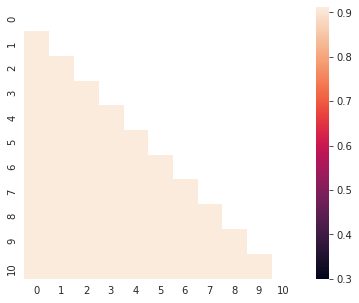

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr = np.corrcoef(np.array(dfnum_nonan))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [ ]:
dfnum_nonan.shape

(11, 114)